In [492]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv("C:/Users/UserName/Desktop/인공지능 개론/데이터 셋/car (1).data")
data

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


<h3>#결측치 확인</h3>

In [493]:
data.isnull().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

<h3>#라벨링 그래프 표시</h3>

In [494]:
data.shape

(1727, 7)

In [495]:
type(data)

pandas.core.frame.DataFrame

In [496]:
X=data.drop('unacc',axis=1)
X.head()

,vhigh,vhigh.1,2,2.1,small,low
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high


In [497]:
y = data['unacc']
y.head()

0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: unacc, dtype: object

Text(0.5, 1.0, 'unacc')

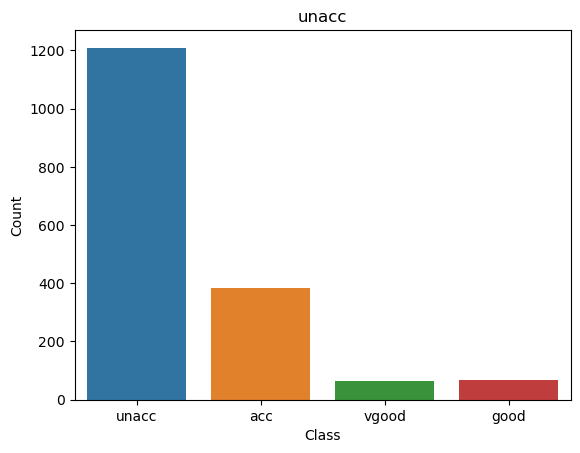

In [498]:
sns.countplot(data = X, x=y)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("unacc")

<h3>#문자->숫자</h3>

In [499]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in data.columns:
    data[i]=le.fit_transform(data[i])

In [500]:
data

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


<h3>#원 핫 인코딩</h3>

In [501]:
#Splitting the data into training and test test
X = data.iloc[:,0:6].values
y = data.iloc[:,6].values

# from sklearn.preprocessing import LabelEncoder
# encoder =  LabelEncoder()
# y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [502]:
y_train

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0]], dtype=uint8)

In [503]:
y_test

array([[1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0]], dtype=uint8)

<h3>#DL classification</h3>

In [504]:
print(type(y_test))
print(type(y_train))
print(type(X_test))
print(type(X_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [505]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(128,input_shape=(6,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(48,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(4,activation='softmax'))##분류는 분류하고자하는 개수, 회귀는 1

model.compile(Adam(lr=0.0023),'categorical_crossentropy',metrics=['accuracy'])##다중 분류 categorical_crossentropy, 두개 분류는 binary_crossentropy, 회귀는 mse

model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_145 (Dense)           (None, 128)               896       
                                                                 
 dense_146 (Dense)           (None, 64)                8256      
                                                                 
 dense_147 (Dense)           (None, 48)                3120      
                                                                 
 dense_148 (Dense)           (None, 12)                588       
                                                                 
 dense_149 (Dense)           (None, 4)                 52        
                                                                 
Total params: 12,912
Trainable params: 12,912
Non-trainable params: 0
_________________________________________________________________


c:\new\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [506]:
#fitting the model and predicting 
import numpy as np
# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
44/44 [==============================] - 1s 8ms/step - loss: 0.9383 - accuracy: 0.6799 - val_loss: 0.7325 - val_accuracy: 0.6994
Epoch 2/30
44/44 [==============================] - 0s 3ms/step - loss: 0.6640 - accuracy: 0.7133 - val_loss: 0.6485 - val_accuracy: 0.7052
Epoch 3/30
44/44 [==============================] - 0s 3ms/step - loss: 0.5916 - accuracy: 0.7299 - val_loss: 0.6045 - val_accuracy: 0.7139
Epoch 4/30
44/44 [==============================] - 0s 4ms/step - loss: 0.4932 - accuracy: 0.7907 - val_loss: 0.5243 - val_accuracy: 0.7977
Epoch 5/30
44/44 [==============================] - 0s 3ms/step - loss: 0.3849 - accuracy: 0.8364 - val_loss: 0.4376 - val_accuracy: 0.7919
Epoch 6/30
44/44 [==============================] - 0s 3ms/step - loss: 0.3319 - accuracy: 0.8610 - val_loss: 0.3230 - val_accuracy: 0.8642
Epoch 7/30
44/44 [==============================] - 0s 3ms/step - loss: 0.2700 - accuracy: 0.8783 - val_loss: 0.2932 - val_accuracy: 0.8584
Epoch 8/30
44/44 [==

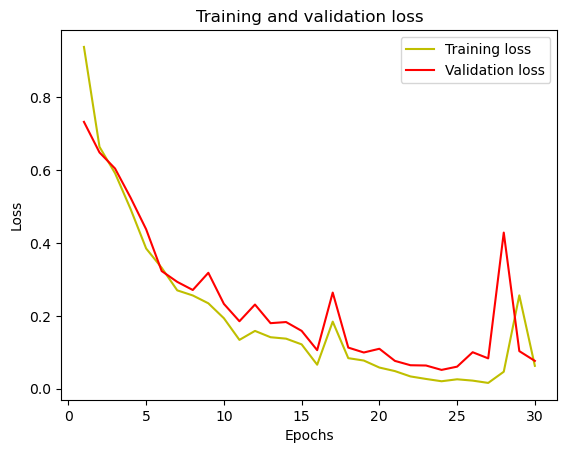

In [507]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

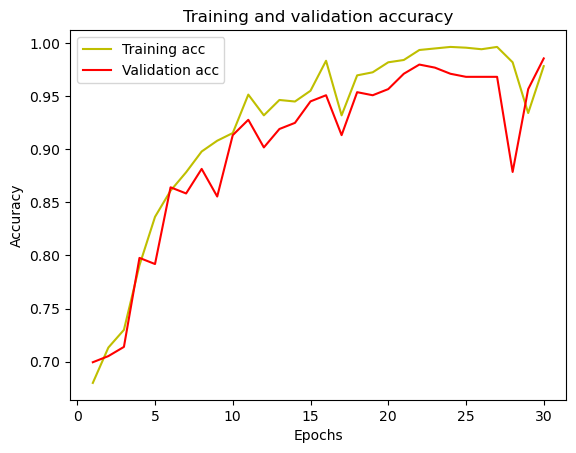

In [508]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [509]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        77
           1       0.93      1.00      0.97        14
           2       1.00      0.99      0.99       239
           3       1.00      0.94      0.97        16

    accuracy                           0.99       346
   macro avg       0.97      0.98      0.97       346
weighted avg       0.99      0.99      0.99       346

[[ 76   1   0   0]
 [  0  14   0   0]
 [  3   0 236   0]
 [  1   0   0  15]]
